In [1]:
# Importing some essential library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Uploading the dataset
df=pd.read_csv('/content/drive/MyDrive/BankNote_Authentication.csv') 

In [3]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
# No. of Rows and No. of columns
print("No. of rows = ", df.shape[0])
print("No. of columns = ", df.shape[1])

No. of rows =  1372
No. of columns =  5


In [5]:
#Information about data types of each column¶
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB
None


In [6]:
# Check the model summary 
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [7]:
# Check Coorelation
df.corr()

,variance,skewness,curtosis,entropy,class
variance,1.000000,0.264026,-0.380850,0.276817,-0.724843
skewness,0.264026,1.000000,-0.786895,-0.526321,-0.444688
curtosis,-0.380850,-0.786895,1.000000,0.318841,0.155883
entropy,0.276817,-0.526321,0.318841,1.000000,-0.023424
class,-0.724843,-0.444688,0.155883,-0.023424,1.000000


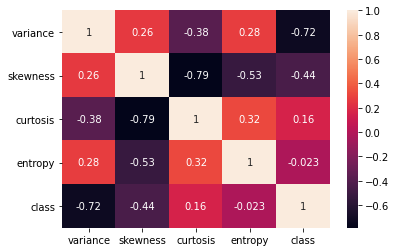

In [8]:
sns.heatmap(df.corr(),annot=True)

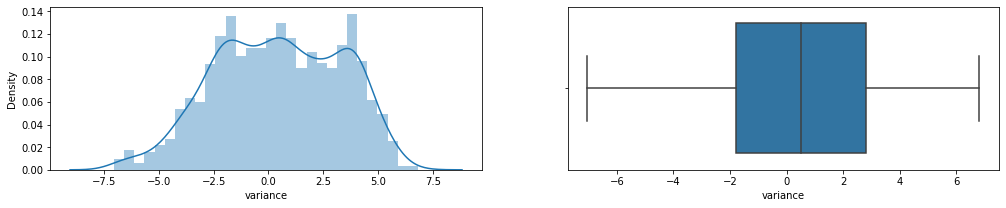

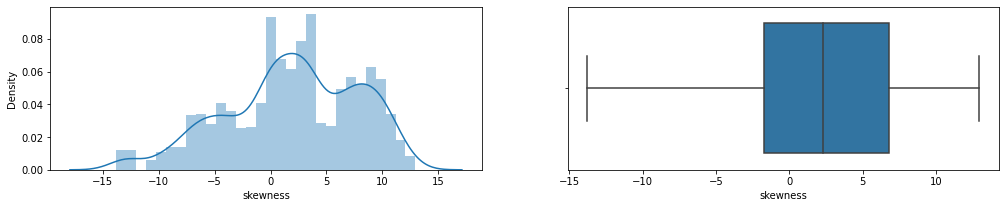

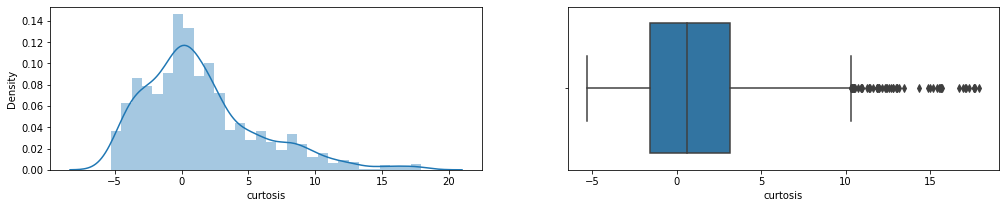

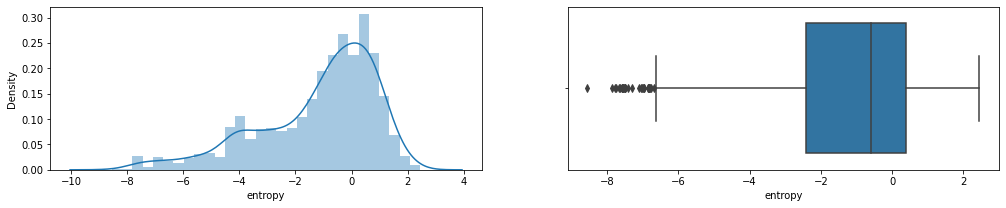

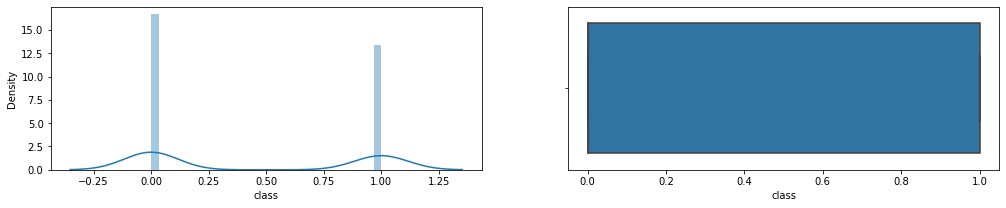

In [9]:
#Univariate analysis of numerical features
for i in df:
    f=plt.figure(figsize=(17,3))
    f.add_subplot(1,2,1)
    sns.distplot(df[i],bins=30)
    f.add_subplot(1,2,2)
    sns.boxplot(df[i])

In [10]:
# Check putliers
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.12180565, 1.14945512, 0.97597007, 0.35456135, 0.89472059],
       [1.44706568, 1.06445293, 0.89503626, 0.12876744, 0.89472059],
       [1.20780971, 0.77735215, 0.12221838, 0.61807317, 0.89472059],
       ...,
       [1.47235682, 2.62164576, 3.75901744, 0.75488418, 1.11766736],
       [1.40669251, 1.75647104, 2.552043  , 0.04315848, 1.11766736],
       [1.04712236, 0.43982168, 0.29861555, 1.1364645 , 1.11766736]])

In [11]:
# Printing the outliers
threshold=3
print(np.where(z>3))

(array([  45,   47,  194,  202,  291,  394,  465,  529,  562,  581,  740,
        765,  820,  826,  881,  887,  942,  948,  974, 1003, 1009, 1064,
       1070, 1125, 1131, 1142, 1186, 1192, 1203, 1218, 1247, 1253, 1264,
       1308, 1314, 1369]), array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2]))


In [12]:
# Removing the outliers
bank_note = df[(z<3).all(axis=1)]

In [13]:
bank_note.shape, df.shape

((1336, 5), (1372, 5))

In [14]:
X = bank_note.iloc[:, 0:4]
X.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [15]:
y=bank_note.iloc[:,-1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [16]:
X.shape

(1336, 4)

In [17]:
y.shape

(1336,)

In [18]:
# Changing the datatype of our independent and dependent variable
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [19]:
# Reshaping our target feature
y = y.reshape(-1,1)

In [20]:
y.shape

(1336, 1)

In [21]:
# Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state=42)

In [22]:
len(X_train), len(X_test), len(y_train), len(y_test)

(1068, 268, 1068, 268)

In [23]:
# Scaling the data before feeding the model
from sklearn.preprocessing import StandardScaler
scaler_train = StandardScaler()
X_train = scaler_train.fit_transform(X_train)

scaler_test = StandardScaler()
X_test = scaler_test.fit_transform(X_test)

In [25]:
# Importing the tensorflow library
import tensorflow as tf
print(tf.__version__)

2.5.0


In [28]:
# Let's create a model to fit on the training data and evaluate on the testing data

# Set random seed
tf.random.set_seed(42)

# 1. Create a model 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(lr=0.01),
              metrics=['accuracy'])

# 3. Fit the model
history = model.fit(X_train, y_train, epochs= 30)

In [27]:
# Evaluate the model on the test dataset
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7.8854e-04 - accuracy: 1.0000


[0.0007885402883403003, 1.0]

Text(0.5, 1.0, 'Model loss curves')

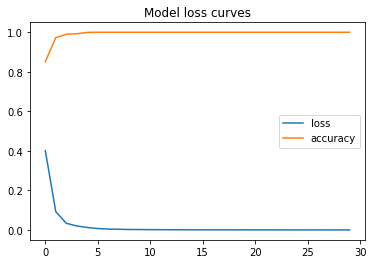

In [29]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model loss curves")

In [28]:
# Let's create a model to fit on the training data and evaluate on the testing data

# Set random seed
tf.random.set_seed(42)

# 1. Create a model 
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

# Create a learning rate callback
lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * (10**(epoch/20)))

# 3. Fit the model
history_1 = model_1.fit(X_train, 
                      y_train,
                      validation_data = (X_test, y_test),
                      batch_size = 32,
                      epochs = 80,
                      callbacks=[lr_schedular])

Epoch 1/80
34/34 [==============================] - 1s 5ms/step - loss: 0.6676 - accuracy: 0.5552 - val_loss: 0.6536 - val_accuracy: 0.5896
Epoch 2/80
34/34 [==============================] - 0s 3ms/step - loss: 0.6583 - accuracy: 0.5618 - val_loss: 0.6450 - val_accuracy: 0.6082
Epoch 3/80
34/34 [==============================] - 0s 2ms/step - loss: 0.6485 - accuracy: 0.5730 - val_loss: 0.6355 - val_accuracy: 0.6194
Epoch 4/80
34/34 [==============================] - 0s 2ms/step - loss: 0.6379 - accuracy: 0.5899 - val_loss: 0.6255 - val_accuracy: 0.6418
Epoch 5/80
34/34 [==============================] - 0s 2ms/step - loss: 0.6265 - accuracy: 0.6199 - val_loss: 0.6144 - val_accuracy: 0.6567
Epoch 6/80
34/34 [==============================] - 0s 2ms/step - loss: 0.6142 - accuracy: 0.6451 - val_loss: 0.6023 - val_accuracy: 0.6828
Epoch 7/80
34/34 [==============================] - 0s 2ms/step - loss: 0.6007 - accuracy: 0.6601 - val_loss: 0.5890 - val_accuracy: 0.7164
Epoch 8/80
34/34 [==

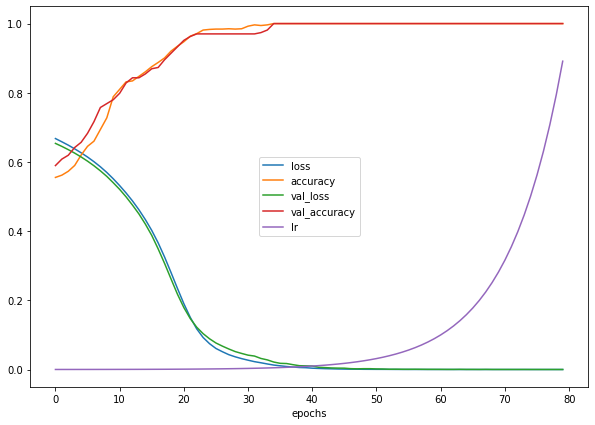

In [30]:
# Check the history
pd.DataFrame(history_1.history).plot(figsize=(10, 7), xlabel="epochs")

Text(0.5, 1.0, 'Learning rate vs Loss')

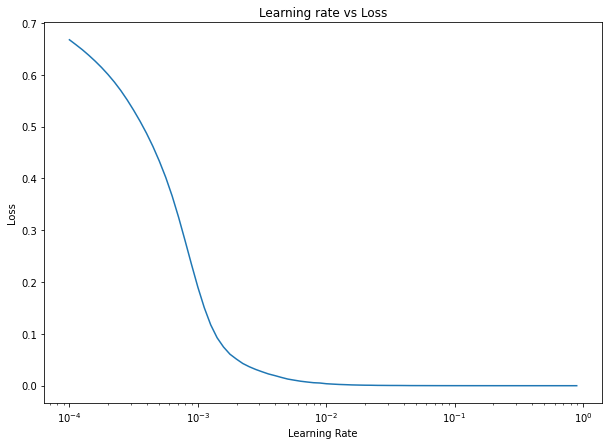

In [31]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(80)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_1.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")

## Let's Build our Final Model with our Learning rate 

In [32]:
#  Let's try using a higher ideal learning rate with the same model as before

# Set random seed
tf.random.set_seed(42)

# 1. Create a model 
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(lr=0.02),
              metrics=['accuracy'])

# 3. Fit the model
history_2 = model_2.fit(X_train, y_train, 
                      validation_data = (X_test, y_test) ,
                      batch_size = 32,
                      epochs= 30)

Epoch 1/30
34/34 [==============================] - 1s 10ms/step - loss: 0.2658 - accuracy: 0.8979 - val_loss: 0.0945 - val_accuracy: 0.9701
Epoch 2/30
34/34 [==============================] - 0s 2ms/step - loss: 0.0280 - accuracy: 0.9906 - val_loss: 0.0212 - val_accuracy: 1.0000
Epoch 3/30
34/34 [==============================] - 0s 2ms/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 0.0083 - val_accuracy: 1.0000
Epoch 4/30
34/34 [==============================] - 0s 2ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.0064 - val_accuracy: 1.0000
Epoch 5/30
34/34 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 0.9991 - val_loss: 0.0031 - val_accuracy: 1.0000
Epoch 6/30
34/34 [==============================] - 0s 2ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 7/30
34/34 [==============================] - 0s 2ms/step - loss: 6.3143e-04 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 8/30
34/3

In [33]:
# Evaluate model 2 on the test dataset
model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3.1507e-04 - accuracy: 1.0000


[0.00031506872619502246, 1.0]

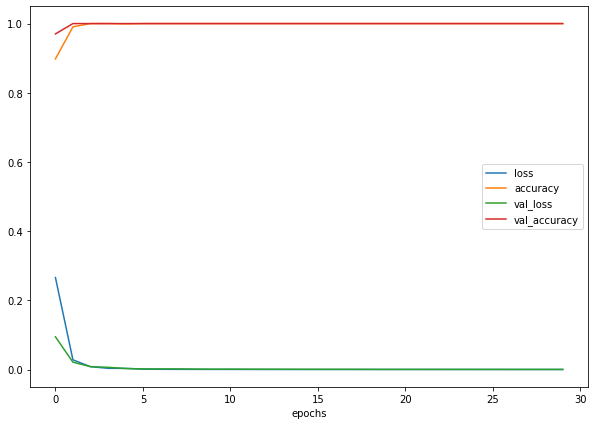

In [34]:
# Check the history
pd.DataFrame(history_2.history).plot(figsize=(10, 7), xlabel="epochs")

In [35]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make prediction
y_preds = model_2.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[157,   0],
       [  0, 111]])

In [36]:
# clssification report 
from sklearn.metrics import classification_report
print(classification_report(y_test, tf.round(y_preds)))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       157
         1.0       1.00      1.00      1.00       111

    accuracy                           1.00       268
   macro avg       1.00      1.00      1.00       268
weighted avg       1.00      1.00      1.00       268



In [37]:
# F1 Score
from sklearn.metrics import f1_score
f1_score(y_test, tf.round(y_preds))

1.0

In [ ]:
# ploating model accuracy
plt.plot(history_2.history['val_accuracy'])

plt.title("model accuracy")

plt.ylabel('accuracy')
plt.xlabel("epoch")
plt.legend(['train'], loc='upper left')

plt.show()

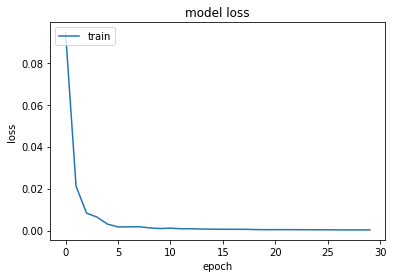

In [39]:
# ploating model loss
plt.plot(history_2.history['val_loss'])

plt.title("model loss")

plt.ylabel('loss')
plt.xlabel("epoch")
plt.legend(['train'],loc='upper left')

plt.show()